<a href="https://colab.research.google.com/github/Totocsy/Cnn_mnist_numbers/blob/main/Mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Keras utilities for model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D # CNN layers

print("TensorFlow Version:", tf.__version__)

# --- Load Dataset ---
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Class names
CLASS_NAMES = [str(i) for i in range(10)]

TensorFlow Version: 2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



--- Data Structure Check (Post-Reshape) ---
Training Images Shape: (60000, 28, 28, 1)
Test Images Shape: (10000, 28, 28, 1)


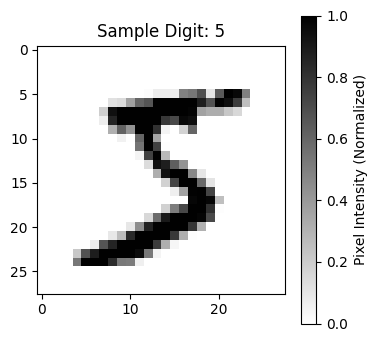

In [3]:
# --- Data Normalization ---
# Convert pixel values from 0-255 to 0.0-1.0
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# --- Reshape for CNN ---
# CNNs expect a 4D array: (samples, height, width, channels)
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

print("\n--- Data Structure Check (Post-Reshape) ---")
print(f"Training Images Shape: {train_images.shape}")
print(f"Test Images Shape: {test_images.shape}")

# --- Visualizing a Single Sample (using adjusted data) ---
sample_index = 0
plt.figure(figsize=(4, 4))
plt.imshow(train_images[sample_index].squeeze(), cmap=plt.cm.binary)
plt.title(f"Sample Digit: {CLASS_NAMES[train_labels[sample_index]]}")
plt.colorbar(label='Pixel Intensity (Normalized)')
plt.grid(False)
plt.show()

In [4]:
# --- Model Configuration ---
INPUT_SHAPE = (28, 28, 1)
OUTPUT_CLASSES = 10

# --- Build Sequential CNN Model ---
model = Sequential([
    Input(shape=INPUT_SHAPE),

    # Block 1
    Conv2D(32, (3, 3), activation='relu', name="Conv_1"),
    MaxPooling2D((2, 2), name="Pool_1"),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', name="Conv_2"),
    MaxPooling2D((2, 2), name="Pool_2"),

    # Classification Head
    Flatten(name="Flatten"),
    Dense(OUTPUT_CLASSES, activation='softmax', name="Output_Layer")
])

# --- Display Model Summary ---
print("\n--- Model Summary ---")
model.summary()


--- Model Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool_1 (MaxPooling2D)           │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool_2 (MaxPooling2D)           │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# --- Compile the Model ---
model.compile(optimizer='adam',
              # Loss function suitable for integer labels (0, 1, 2, ...)
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Training Parameters ---
EPOCHS = 8
BATCH_SIZE = 64
VALIDATION_SPLIT = 0.1

print("Model is compiled and ready for training!")
print(f"Epochs: {EPOCHS}, Batch Size: {BATCH_SIZE}, Validation Split: {VALIDATION_SPLIT}")

Model is compiled and ready for training!
Epochs: 10, Batch Size: 64, Validation Split: 0.1


In [6]:
print("\n--- Training Model ---")

# Execute the training process
history = model.fit(train_images,
                    train_labels,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=VALIDATION_SPLIT)



--- Training Model ---
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8513 - loss: 0.4974 - val_accuracy: 0.9810 - val_loss: 0.0631
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9797 - loss: 0.0690 - val_accuracy: 0.9843 - val_loss: 0.0551
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9862 - loss: 0.0459 - val_accuracy: 0.9860 - val_loss: 0.0495
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9884 - loss: 0.0354 - val_accuracy: 0.9903 - val_loss: 0.0353
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9896 - loss: 0.0318 - val_accuracy: 0.9887 - val_loss: 0.0402
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9935 - loss: 0.0233 - val_accuracy: 0.9880 - val_loss: 0.0477
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9929 - loss: 0.0219 - val_accuracy: 0.9907 - val_loss: 0.0350
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9943 - loss: 0

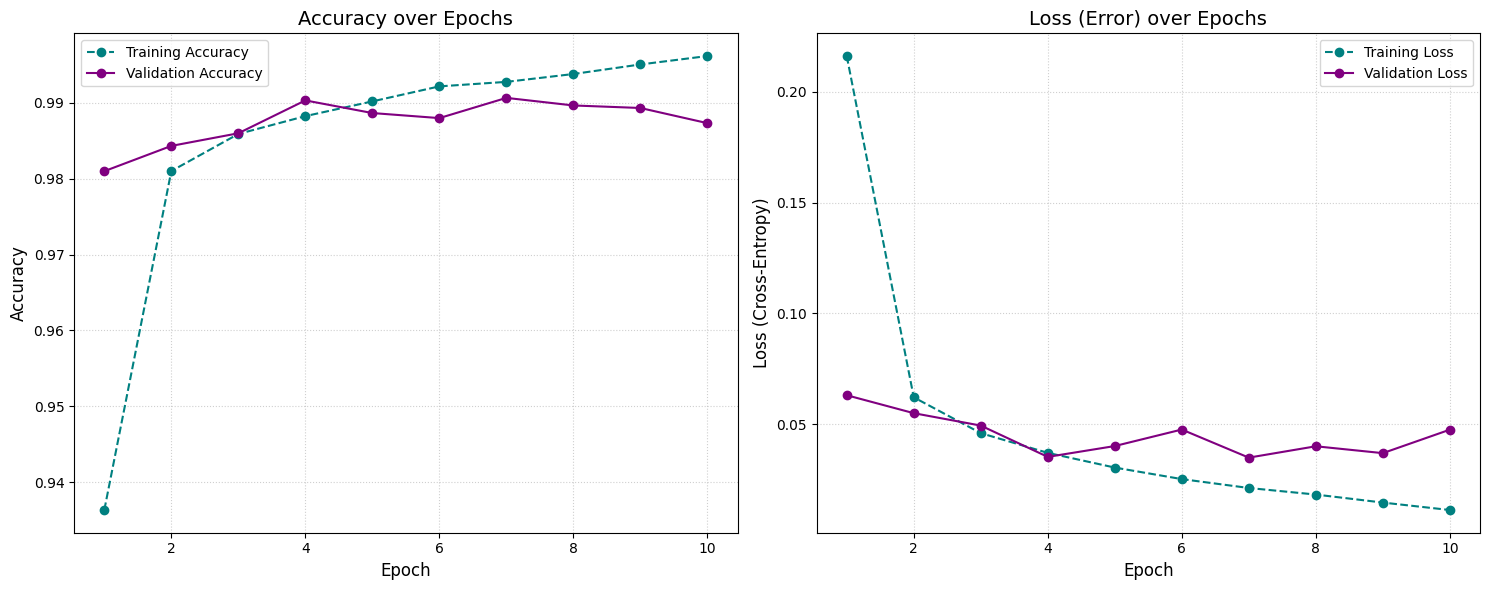

In [7]:
# --- Retrieve Training History Data ---
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1

# --- Plotting Results ---
plt.figure(figsize=(15, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(hist_df.epoch, hist_df.accuracy, label='Training Accuracy', color='teal', marker='o', linestyle='--')
plt.plot(hist_df.epoch, hist_df.val_accuracy, label='Validation Accuracy', color='purple', marker='o')
plt.title('Accuracy over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(hist_df.epoch, hist_df.loss, label='Training Loss', color='teal', marker='o', linestyle='--')
plt.plot(hist_df.epoch, hist_df.val_loss, label='Validation Loss', color='purple', marker='o')
plt.title('Loss (Error) over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Cross-Entropy)', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()


--- Final Evaluation on Test Data ---
Test Loss: 0.0350
Test Accuracy (Final Accuracy): 98.92%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Model Predictions Analysis (Top 5 Samples):


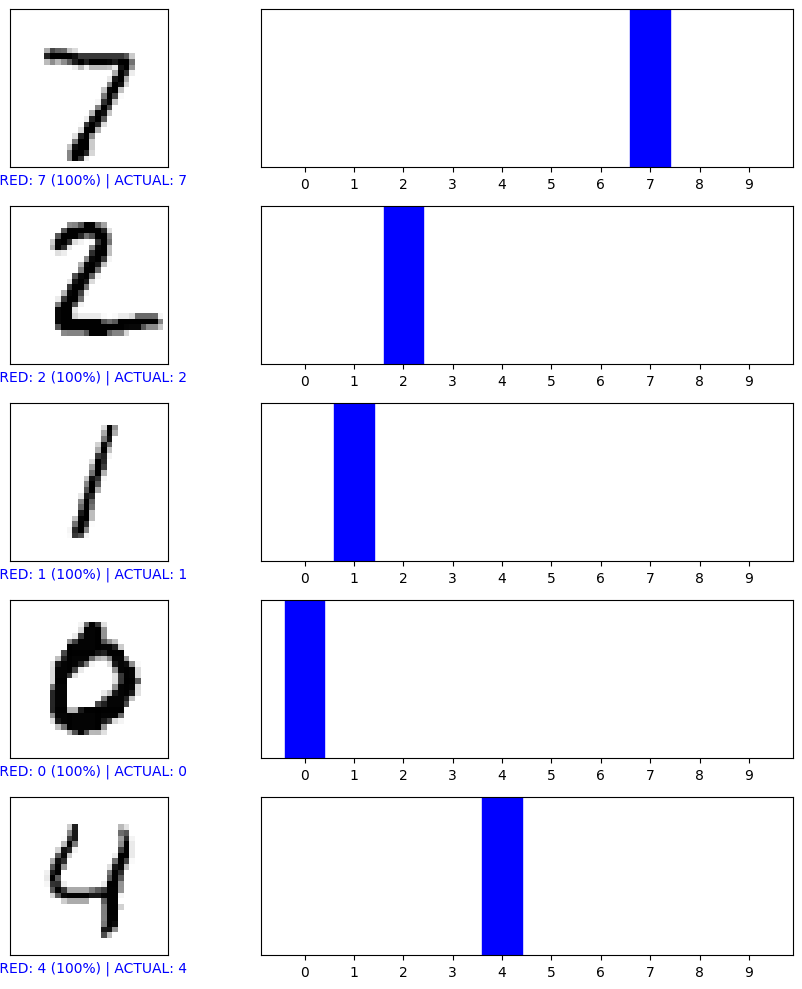

In [8]:
# --- Final Evaluation on Test Data ---
print("\n--- Final Evaluation on Test Data ---")
# Evaluate performance on the unseen test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy (Final Accuracy): {test_acc*100:.2f}%')

# --- Generate Predictions ---
# Make probability predictions for the entire test set
predictions = model.predict(test_images)

# --- Simplified Visualization Functions ---

def plot_image(index, prediction_array, true_label, image, ax):
  """Plots the input image with the prediction outcome."""
  # Use .squeeze() to remove the channel dimension (28, 28, 1) -> (28, 28) for plotting
  img = image[index].squeeze()
  pred_array, true_label = prediction_array[index], true_label[index]

  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)

  # Set title color based on correctness
  color = 'blue' if predicted_label == true_label else 'red'

  ax.set_xlabel("PRED: {} ({:2.0f}%) | ACTUAL: {}".format(CLASS_NAMES[predicted_label],
                                100*np.max(pred_array),
                                CLASS_NAMES[true_label]),
                                color=color)

def plot_value_array(index, prediction_array, true_label, ax):
  """Plots the prediction probabilities as a bar chart."""
  pred_array, true_label = prediction_array[index], true_label[index]

  ax.grid(False)
  ax.set_xticks(range(10))
  ax.set_yticks([])
  ax.set_ylim([0, 1])

  # Plot bars (default gray)
  thisplot = ax.bar(range(10), pred_array, color="#777777")

  predicted_label = np.argmax(pred_array)

  # Highlight the bars: Predicted (Red), Actual (Blue)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# --- Visualize Predictions ---
NUM_SAMPLES = 5

print(f"\nModel Predictions Analysis (Top {NUM_SAMPLES} Samples):")

# Simple loop using standard subplot organization (5 rows, 2 columns)
plt.figure(figsize=(2 * 5, 2 * NUM_SAMPLES))

for i in range(NUM_SAMPLES):
    # Plot image in column 1
    ax1 = plt.subplot(NUM_SAMPLES, 2, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images, ax1)

    # Plot bar chart in column 2
    ax2 = plt.subplot(NUM_SAMPLES, 2, 2 * i + 2)
    plot_value_array(i, predictions, test_labels, ax2)

plt.tight_layout()
plt.show()